# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Brendi Kargel

https://github.com/bkargel/44620-80-web-scraping-kargel

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

# Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
from bs4 import BeautifulSoup
import requests
import pickle

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

# Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

parser = 'html.parser'
soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')
print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

# Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.lower_ for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print(word_freq.most_common(5))

[('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]


# Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(5))

[('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]


# Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [5]:
def we_care_about(token):
    return not (token.is_space or token.is_punct)

interesting_token = [token.lower_ for token in doc if we_care_about(token)]
interesting_token = list()
for token, freq in word_freq.most_common(5):
    interesting_token.append(token)

interesting_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    interesting_lemmas.add(lemma)

sentences = list(doc.sents)
total_count = list()
whole_sents = list()
for sentence in sentences:
    count = 0
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    whole_sents.append(sent_str)
    for token in sentence:
        if not (token.is_space or token.is_punct):
            count += 1
    total_count.append(count)
       
def score_sentence_by_token(sentence, interesting_token):
    token_count = 0
    for token in sentences[sentence]:
        if token.lower_ in interesting_token:
            token_count += 1
    token_score = token_count/total_count[sentence]
    print('TOKEN SCORE:',token_score,'TOTAL TOKENS:',token_count,'TOTAL WORDS:',total_count[sentence])

def score_sentence_by_lemma(sentence, interesting_lemmas):
    lemma_count = 0
    for token in sentences[sentence]:
        if token.lemma_.lower() in interesting_lemmas:
            lemma_count += 1
    lemma_score = lemma_count/total_count[sentence]
    print('LEMMA SCORE:',lemma_score,'TOTAL LEMMAS:',lemma_count,'TOTAL WORDS:',total_count[sentence])
    
print(whole_sents[4])    
score_sentence_by_token(4,interesting_token)
score_sentence_by_lemma(4,interesting_lemmas)

Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
TOKEN SCORE: 0.038461538461538464 TOTAL TOKENS: 1 TOTAL WORDS: 26
LEMMA SCORE: 0.11538461538461539 TOTAL LEMMAS: 3 TOTAL WORDS: 26


# Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

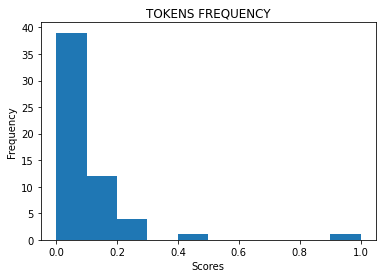

In [6]:
import matplotlib.pyplot as plt
import numpy as np

token_count = list()
token_scores = list()
for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lower_ in interesting_token:
            count +=1
    token_count.append(count)
for i in total_count:
    token_scores = [a/b for a,b in zip(token_count,total_count)]

x = np.array(token_scores)  
plt.hist(x)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('TOKENS FREQUENCY')
plt.show()

#The most common range of scores is between 0.0 and 0.1, followed by score between 0.1 and 0.2. There are only a small 
#percentage of scores over 0.2, with the highest scores falling between 0.9 and 1.0.

# Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

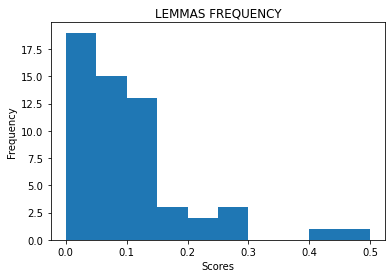

In [7]:
import matplotlib.pyplot as plt
import numpy as np

lemma_count = list()
lemma_scores = list()
for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lemma_.lower() in interesting_lemmas:
            count +=1
    lemma_count.append(count)
for i in total_count:
    lemma_scores = [a/b for a,b in zip(lemma_count,total_count)]

x = np.array(lemma_scores)  
plt.hist(x)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('LEMMAS FREQUENCY')
plt.show()

# Most of the lemma scores fall between 0 and 0.15, with a small percentage between 0.15 and 0.5. However, unlike the
# token score, there are no lemma scores above 0.5.

# Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

**If the code is changed to only consider nouns, we would add the part of speech code to recognize "noun", as seen in the below code. Because all of our interesting words are nouns, we have the same words returned, but for a different number of times. "Laser" returns only 34 times as a noun, vs. 40 when the part of speech is not designated. This is likely due to how it is used in the sentence in which it is contained. "Laser" can also be a verb. However, "headlight" is only a noun, so I'm not sure why it returned only 25 times, when it was 28 before noun was specified. It could just be the way it's used in the sentence, making it difficult for the code to pick it out as a noun.**

In [8]:
nouns_only = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN"]
nouns_freq = Counter(map(str,nouns_only))
print(nouns_freq.most_common(5))

[('laser', 34), ('headlight', 25), ('beam', 12), ('led', 11), ('technology', 10)]
